## Tikhonov Regularization (Ridge Regression)
Tikhonov regularization, aslo known as ridge regression is the most commonly used method to fix the problems posed by OLS, such as [over-determined](https://en.wikipedia.org/wiki/Overdetermined_system), [under-determined](https://en.wikipedia.org/wiki/Underdetermined_system), or noise sensitive model.

Remember the OLS minimization problem:
$$
\begin{align}
OLS &= \min_\omega{\parallel X\omega-y\parallel_2^2}
\end{align}
$$
One observation is that $\omega$ is not constrained, and potentially can become really big. In case of noisy data, this will lead to noise amplification as well. In order to solve it, we can put some penalty $\lambda$ on the weights $\omega$, and use it in the minimization problem:
$$
\begin{align}
Ridge &= \min_\omega{\left(\parallel X\omega-y\parallel_2^2 + \parallel\Lambda\omega \parallel_2^2\right)},
\end{align}
$$
where $\Lambda = \lambda I$, and $I$ is an identity matrix. The solution to the problem is
$$
\begin{align}
\hat{\omega} &= \left(X^TX+\Lambda^T\Lambda\right)^{-1}X^Ty
\end{align}
$$

To visualize how OLS and Ridge differ, let us plot pairs of points for both methods, and see how the prediction differs.

Populating the interactive namespace from numpy and matplotlib


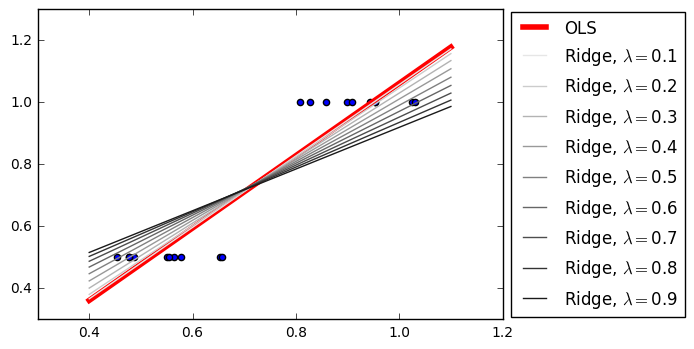

In [40]:
%pylab --no-import-all inline
import _utils

x_base = (.5, 1.)
X = np.matrix([x_base[0]]*10 + [x_base[1]]*10).T
y = np.matrix([.5]*10 + [1]*10).T
np.random.seed(42)
X += np.random.normal(scale=0.1, size=X.shape)
plt.scatter(X, y, s=20)
omega_ols = _utils.ols(X, y)

x_base = x_base[0] - 0.1, x_base[1] + 0.1
X_ols, y_ols = _utils.generate_linear_1D(x_range = x_base, coeffs = omega_ols[1:], intercept = omega_ols[0])
plt.plot(X_ols, y_ols, 'r', lw=4, label='OLS')

for lamb in np.arange(0.1, 1, 0.1):
    omega_ridge = _utils.ridge(X, y, lamb=lamb)
    X_ridge, y_ridge = _utils.generate_linear_1D(x_range = x_base, coeffs = omega_ridge[1:], intercept = omega_ridge[0])
    plt.plot(X_ridge, y_ridge, color=str(1. - lamb), label='Ridge, $\lambda=$%.1f'%lamb)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Notice that by changing the $\lambda$ value, it is possible to change the OLS solution and make it more general. However, it is important to note, that the value of $\lambda$ should be determined through [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics).